# YouTube Text Data Analysis

### STEP 1: IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### STEP 2: LOADING THE US COMMENTS DATASET

In [3]:
df=pd.read_csv(r'C:\Users\saish\Downloads\Work\Youtube/UScomments.csv',on_bad_lines='skip')

In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


### STEP 3: ANALYZING THE LOADED DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [6]:
df.describe()

,video_id,comment_text,likes,replies
count,691400,691375,691400,691400
unique,2266,434076,1284,479
top,XpVt6Z1Gjjo,Lol,0,0
freq,800,310,456894,525730


In [7]:
## Finding out the missing values in the data
df.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [8]:
df[df['comment_text'].isna()]

,video_id,comment_text,likes,replies
76134,7YAAyUFL1GQ,NaN,0,0
215218,KUCHBBCj77I,NaN,0,0
234226,KUCHBBCj77I,NaN,0,0
306019,s3Hk_lDw5yo,NaN,0,0
332811,zrOHeEA14kQ,NaN,0,0
357506,zmg9tVaMVd4,NaN,0,0
379582,zmg9tVaMVd4,NaN,0,0
403013,9eea7_7OBZQ,NaN,0,0
425238,6l5P7jHUcjI,NaN,0,0
436348,IQisUbBljW0,NaN,0,0


In [9]:
## droping the missing values..
df.dropna(inplace=True)

In [10]:
df.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### STEP: 4 PERFORMING SENTIMENT ANALYSIS

In [ ]:
### Using TextBlob which is a NLP library built on top of NLTK (can also use SpaCy)..

In [11]:
!pip install textblob

In [12]:
from textblob import TextBlob

In [13]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [ ]:
### Here polarity is the measure between positive and negative comments(ranging from -1 to 1 where -1 is negative sentiment and 1 is positive sentiment)

In [14]:
polarity=[]
for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [15]:
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


In [16]:
df.shape

(691375, 4)

In [17]:
df['polarity']=polarity

### STEP 5: WORD CLOUD ANALYSIS

In [18]:
comments_positive=df[df['polarity']==1]
comments_negative=df[df['polarity']==-1]

In [19]:
comments_negative.head(2)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0


In [20]:
comments_positive.head(2)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0


In [21]:
!pip install wordcloud

In [22]:
from wordcloud import WordCloud , STOPWORDS

In [ ]:
### Joining all the negative and positive comments together

In [23]:
total_negative_comments=' '.join(comments_negative['comment_text'])
total_positive_comments=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

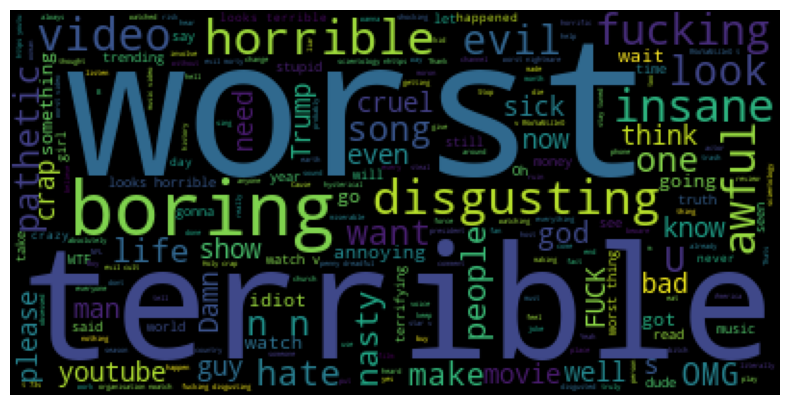

In [24]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
### Conclusion-->> Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

(-0.5, 399.5, 199.5, -0.5)

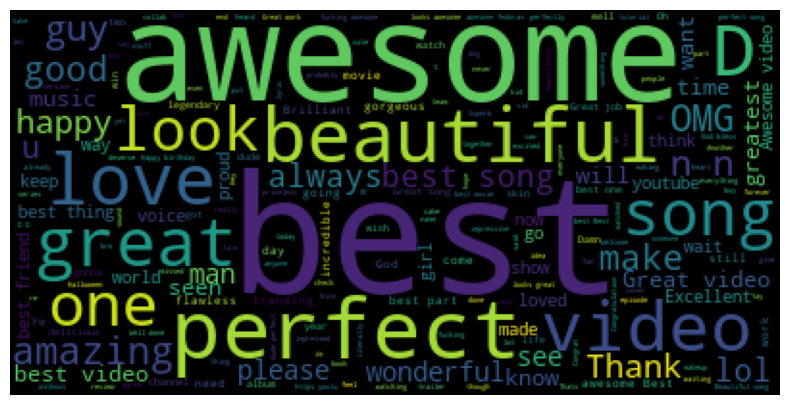

In [25]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
### Conclusion-->> Users are emphasizing more on awesome , best ,beitiful ,perfect , great etc..

### STEP 6: PERFORMING EMOJI ANALYSIS

In [26]:
!pip install emoji

In [27]:
import emoji

In [28]:
emoji_list=[]
for comment in df['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [29]:
print(emoji_list[:10])

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']


In [30]:
len(emoji_list)

294549

In [ ]:
### Getting the count of the emoji..

In [31]:
emoji_dict={}
for i in emoji_list:
    if i not in emoji_dict:
        emoji_dict[i]=1
    else:
        emoji_dict[i]+=1

In [32]:
list(emoji_dict.items())[:10]

[('‼', 211),
 ('😉', 998),
 ('😭', 8398),
 ('👍', 5476),
 ('🏻', 3438),
 ('❤', 31119),
 ('😍', 33453),
 ('💋', 968),
 ('💙', 2831),
 ('👈', 126)]

In [ ]:
### Top 10 emoji's used are:

In [33]:
from operator import itemgetter
N=10
top_emoji_count=dict(sorted(emoji_dict.items(), key = itemgetter(1), reverse = True)[:N])
top_emoji_count

{'😂': 36987,
 '😍': 33453,
 '❤': 31119,
 '🔥': 8694,
 '😭': 8398,
 '👏': 5719,
 '😘': 5545,
 '👍': 5476,
 '💖': 5359,
 '💕': 5147}

In [34]:
keys=list(top_emoji_count.keys())
values=list(top_emoji_count.values())

In [35]:
!pip install plotly

In [36]:
import plotly.graph_objs as go

In [37]:
from plotly.offline import iplot

In [38]:
colors=['#00138f', '#001fbb', '#0028e6', '#1a3fff', '#3356ff', '#4d6dff', '#6684ff', '#80abff', '#99c2ff', '#b3d9ff']

freq=go.Bar(x=keys,y=values,marker=dict(color=colors))

In [136]:
iplot([freq])

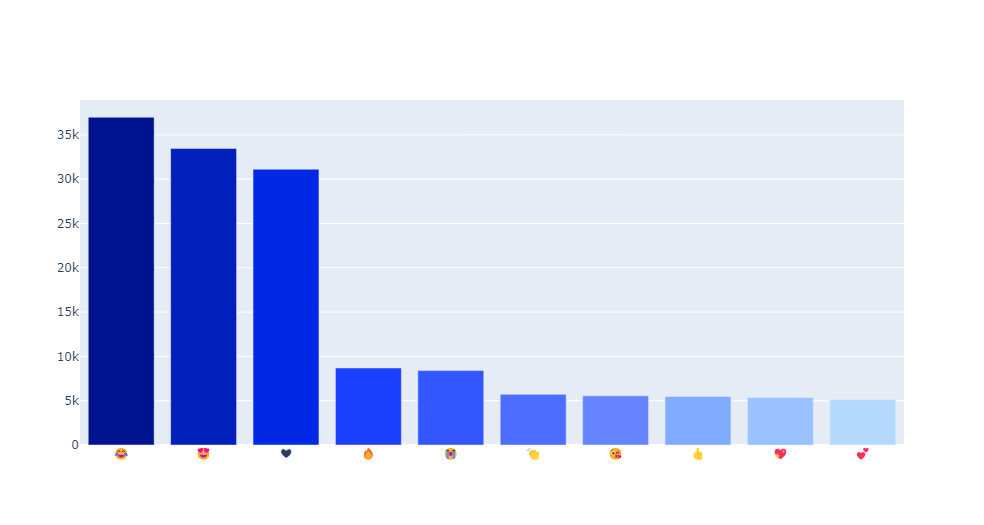

In [141]:
from IPython.display import Image
Image(filename='emojiplot.png')

#### Since iplot isn't supported on github 

In [ ]:
### Conclusion 😂 is the most used emoji

### STEP 7: COLLECTING ENTIRE YOUTUBE DATASET

In [ ]:
### import os module for working with files and directories in the operating system.

In [40]:
import os

In [41]:
path=r'C:\Users\saish\Downloads\Work\Youtube\additional_data'

In [42]:
files=os.listdir(path)

In [43]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [44]:
files_csv=[i for i in files if '.csv' in i]

In [45]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [46]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',on_bad_lines='skip')
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

In [47]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA


In [48]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country'],
      dtype='object')

### STEP 8: CATEGORY WITH MOST LIKES AND DISLIKES

In [ ]:
### Importing category dataset

In [49]:
path=(r'C:\Users\saish\Downloads\Work\Youtube/category_file.txt')
category_df=pd.read_csv(path,on_bad_lines='skip')

In [50]:
category_df.head()

,Category_id Category_name
0,1: Film & Animation
1,2: Autos & Vehicles
2,10: Music
3,15: Pets & Animals
4,17: Sports


In [51]:
category_df.reset_index(inplace=True)

In [52]:
category_df.head()

,index,Category_id Category_name
0,0,1: Film & Animation
1,1,2: Autos & Vehicles
2,2,10: Music
3,3,15: Pets & Animals
4,4,17: Sports


In [53]:
category_df.columns=['category_id','category_name']

In [54]:
category_df.head()

,category_id,category_name
0,0,1: Film & Animation
1,1,2: Autos & Vehicles
2,2,10: Music
3,3,15: Pets & Animals
4,4,17: Sports


In [55]:
category_df[['category_id','category_name']]=category_df.category_name.str.split(":",expand=True)

In [56]:
category_df.set_index('category_id').head(5)

,category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [57]:
dct=category_df.to_dict()

In [58]:
dct['category_name']

{0: ' Film & Animation',
 1: ' Autos & Vehicles',
 2: ' Music',
 3: ' Pets & Animals',
 4: ' Sports',
 5: ' Short Movies',
 6: ' Travel & Events',
 7: ' Gaming',
 8: ' Videoblogging',
 9: ' People & Blogs',
 10: ' Comedy',
 11: ' Entertainment',
 12: ' News & Politics',
 13: ' Howto & Style',
 14: ' Education',
 15: ' Science & Technology',
 16: ' Nonprofits & Activism',
 17: ' Movies',
 18: ' Anime/Animation',
 19: ' Action/Adventure',
 20: ' Classics',
 21: ' Comedy',
 22: ' Documentary',
 23: ' Drama',
 24: ' Family',
 25: ' Foreign',
 26: ' Horror',
 27: ' Sci-Fi/Fantasy',
 28: ' Thriller',
 29: ' Shorts',
 30: ' Shows',
 31: ' Trailers            '}

In [59]:
full_df['category_name']=full_df['category_id'].map(dct['category_name'])

In [60]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Comedy
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Drama
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Drama


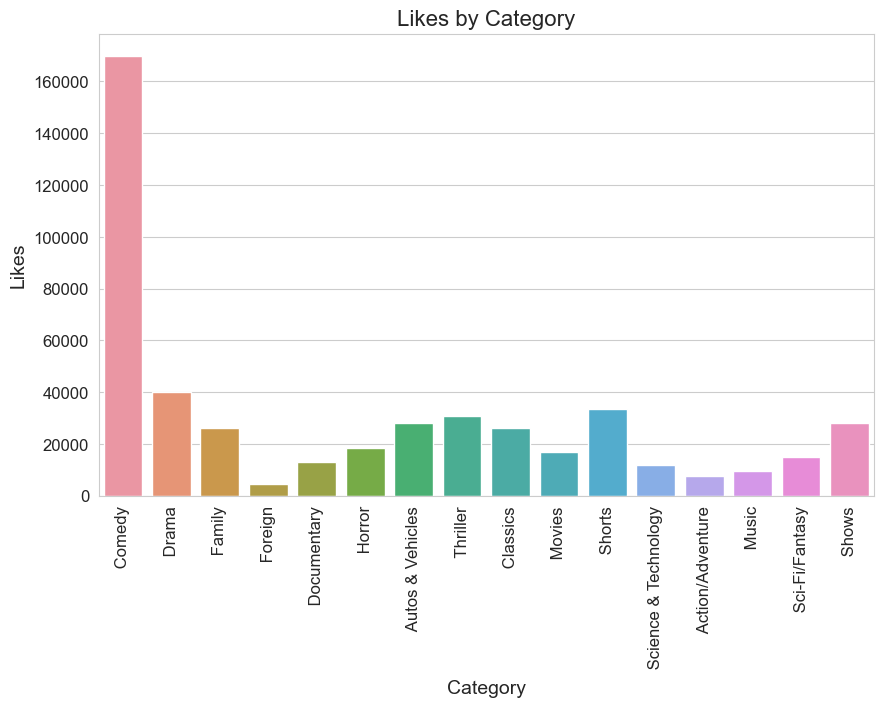

In [117]:
# Create a barplot with seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="category_name", y="likes", data=full_df,ci=None)

# Add labels to the plot
plt.title("Likes by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Likes", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


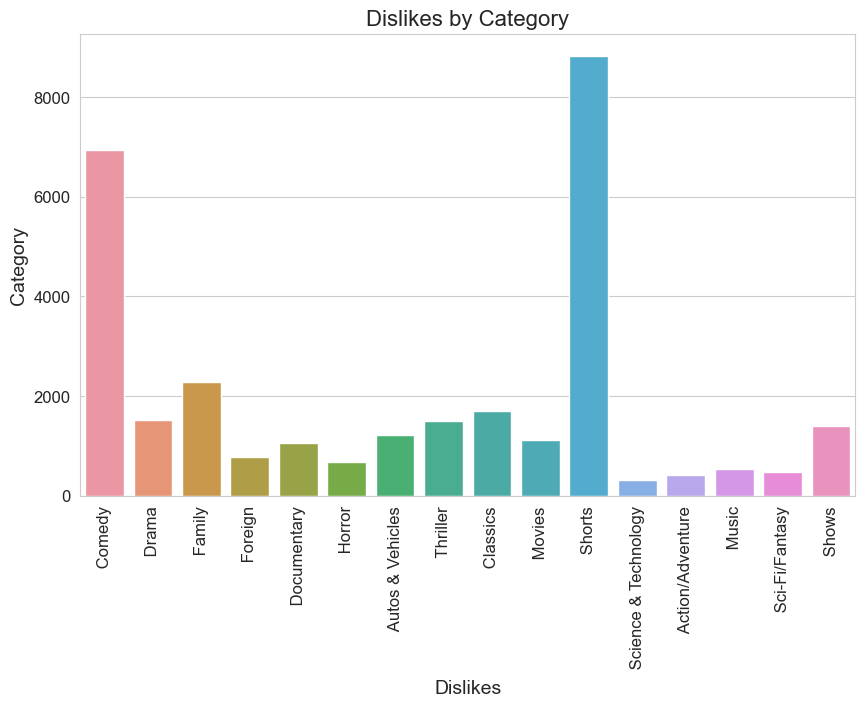

In [118]:
# Create a barplot with seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="category_name", y="dislikes", data=full_df ,ci=None)

# Add labels to the plot
plt.title("Dislikes by Category", fontsize=16)
plt.xlabel("Dislikes", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [ ]:
### Conclusion Comedy has the most likes and Shorts has the most dislikes

### STEP 9: CATEGORY WITH MOST VIEWS

In [66]:
df_view=full_df.groupby('category_name')['views'].sum().sort_values(ascending=False)
df_view=pd.DataFrame(df_view)
df_view.head()

,views
category_name,
Comedy,255967088943
Family,104517467253
Autos & Vehicles,27619347901
Documentary,23600365409
Drama,22050866339


In [ ]:
### Conclusion Comedy category has the highest views

### STEP 10: CATEGORY WITH LIKES PER VIEW RATIO

In [67]:
full_df['likes_per_view']=full_df['likes'] / full_df['views']

In [68]:
df_category=full_df[['category_name', 'likes_per_view']].sort_values('likes_per_view',ascending=False).head(5)
df_category

,category_name,likes_per_view
15561,Family,0.942888
15525,Shorts,0.700424
5572,Family,0.494823
24395,Drama,0.451851
16999,Comedy,0.450509


Text(0, 0.5, 'Likes per View')

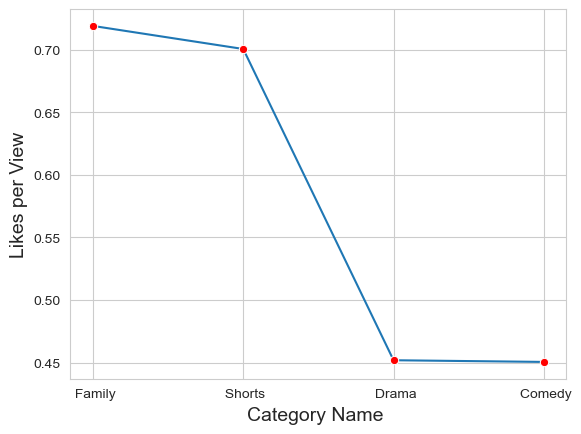

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='category_name', y='likes_per_view' , data = df_category, ci=None,marker='o',markerfacecolor='red')
plt.xlabel("Category Name ", fontsize=14)
plt.ylabel("Likes per View", fontsize=14)

In [73]:
### Conclusion Category Family has the higest likes oer view ratio

### STEP 11: CORRELATION BETWEEEN LIKES AND VIEWS

<AxesSubplot:>

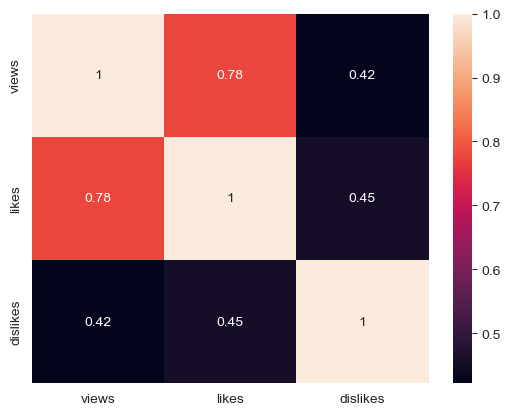

In [129]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

In [130]:
### Conclusion views have a high correlation with likes

### STEP 12: LIKES PER VIEWS COUNTRY-WISE

<AxesSubplot:xlabel='views', ylabel='likes'>

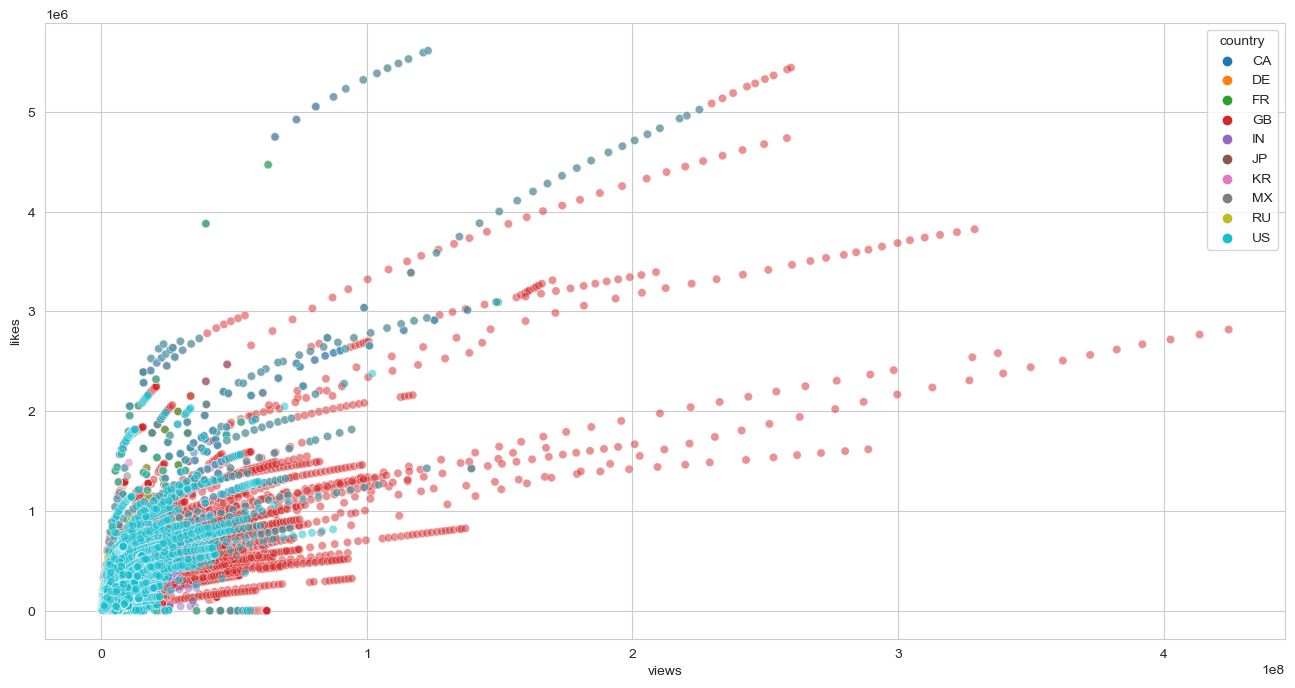

In [77]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=full_df["views"], y=full_df["likes"], hue=full_df["country"] , alpha =0.5)

### STEP 12: RELATION OF PUNCTUATIONS IN TITLES

In [78]:
import string

In [128]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
### Defining a function to count the number of punctuation in title 

In [81]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [84]:
sample_df=full_df[0:10000]

In [86]:
sample_df['count_punc']=sample_df['title'].apply(punc_count)

<AxesSubplot:xlabel='count_punc', ylabel='views'>

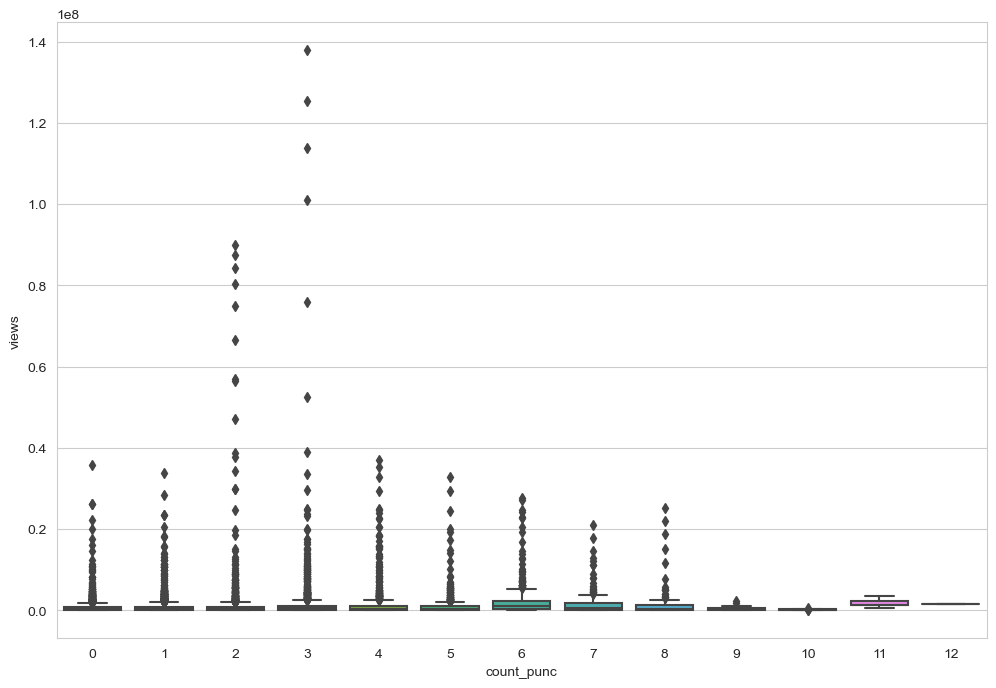

In [88]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample_df)

In [89]:
sample_df['count_punc'].corr(sample_df['views'])

0.06510009783044877

In [ ]:
### Conclusion Though there isnt much relation between puncatuation and views but titles having count of punctuation equal to three has high views

### STEP 13: WORLD-MAP BASED ON VIEWS 

In [ ]:
### For creating a world map we need full country name. We will use map function for it. 

In [93]:
country={'CA':'Canada', 'DE':'Germany', 'FR':'France', 'GB':'United Kingdom', 'IN':'India', 'JP':'Japan', 'KR':'Korea', 'MX':'Mexico', 'RU':'Russia', 'US':'United States'}

In [95]:
full_df['country_name']=full_df['country'].map(country)

In [99]:
full_df['country_name'].unique()

array(['Canada', 'Germany', 'France', 'United Kingdom', 'India', 'Japan',
       'Korea', 'Mexico', 'Russia', 'United States'], dtype=object)

In [106]:
country_df= full_df.groupby('country_name').sum()
country_df.head(10)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,likes_per_view
country_name,,,,,,,,,
Canada,850143,46891975069,1618179878,82137919,206161849,583,279,27,1365.911260
France,819522,17100897444,708144090,33188528,74624804,889,704,22,1794.435411
Germany,845626,24645115205,893395538,57059031,113774380,1044,672,14,1611.147451
India,805929,39610961029,1011593670,62194142,99991208,1204,781,11,822.935137
Japan,406510,5377466630,165406898,7528321,24547106,1414,1390,12,400.354891
Korea,730666,14689152313,421247912,18634999,70011397,511,1400,41,714.846985
Mexico,849598,13849692994,641627186,30223385,82506287,440,634,24,1936.526591
Russia,825451,9806494525,506598491,60098157,72321143,1062,1007,10,2020.723398
United Kingdom,654876,230069198174,5234962944,296250384,509346351,683,272,69,1313.801303


In [107]:
country_df.reset_index(inplace=True)

In [109]:
country_df=country_df[['country_name','views','likes']]
country_df.head(10)

,country_name,views,likes
0,Canada,46891975069,1618179878
1,France,17100897444,708144090
2,Germany,24645115205,893395538
3,India,39610961029,1011593670
4,Japan,5377466630,165406898
5,Korea,14689152313,421247912
6,Mexico,13849692994,641627186
7,Russia,9806494525,506598491
8,United Kingdom,230069198174,5234962944
9,United States,96671770152,3041147198


In [127]:
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

In [ ]:
### Creating a map using choropleth

In [114]:
data=dict(type='choropleth',locations=country_df['country_name'],locationmode='country names',z=country_df['views'],colorscale = 'Viridis',
            reversescale = True,text=country_df['country_name'],colorbar = {'title' : 'Views Per Billion'})

In [115]:
layout = dict(title = 'Views per Country',
              geo = dict(scope='world',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [142]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False, auto_play=True)

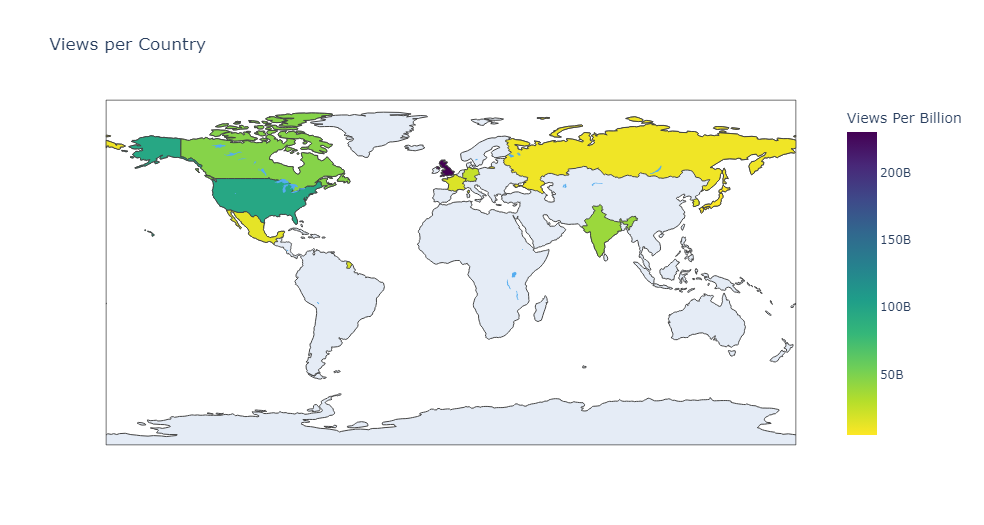

In [143]:
from IPython.display import Image
Image(filename='mapplot.png')

#### Since choromap isn't supported on github

In [135]:
### Conclusion United Kingdom has the highest view count

### STEP 14: TAGS RELATION WITH VIEWS

In [ ]:
### Defining a function to count the number of tags

In [123]:
def count_tagg(text):
    c=len([x for x in text.split('|')])
    return c

In [124]:
full_df['c_tags']=full_df['tags'].apply(count_tagg)

In [125]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,likes_per_view,country_name,c_tags
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Comedy,0.045891,Canada,6
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Drama,0.125949,Canada,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Drama,0.045758,Canada,23
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Family,0.063096,Canada,14
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Comedy,0.048746,Canada,10


In [134]:
tags_df=full_df[['c_tags','views']]
tags_df.sort_values('c_tags',ascending=False)[:10]

,c_tags,views
1879,152,16463
27125,132,1770365
26768,132,1186202
26604,132,738011
26945,132,1605792
27346,132,1873207
2314,129,175575
2502,129,464844
3126,129,843888
2820,129,693737


<AxesSubplot:xlabel='c_tags', ylabel='views'>

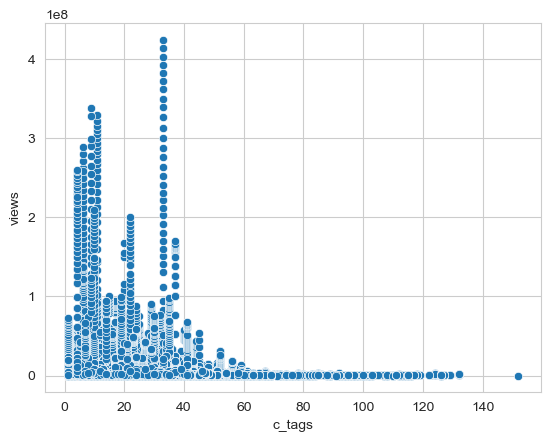

In [132]:
sns.scatterplot(x='c_tags',y='views',data=tags_df)

In [138]:
### Conclusion  Having count of tags in range of 0-40 gives the maximum views